In [46]:
import sys
sys.path.append("../tsy935/RubinLab_neurotranslate_eeg-master/eeg/data/")
sys.path.append("../forward_model/")
import stacklineplot
import pyedflib
import numpy as np
from pylab import rcParams
import h5py
rcParams['figure.figsize'] = 20, 10

In [16]:
train_files = open("../tsy935/RubinLab_neurotranslate_eeg-master/eeg/data/train_seizure_files.txt", "r").readlines()
train_files = [x.strip("\n").split(",") for x in train_files]

In [17]:
train_files[:10]

[['/mnt/data1/eegdbs/TUH/temple/tuh-sz-v1.2.0/v1.2.0/train/03_tcp_ar_a/00000883/s012_2010_09_13/00000883_s012_t003.edf',
  '0',
  '0'],
 ['/mnt/data1/eegdbs/TUH/temple/tuh-sz-v1.2.0/v1.2.0/train/03_tcp_ar_a/00007032/s007_2011_02_10/00007032_s007_t004.edf',
  '1',
  '0'],
 ['/mnt/data1/eegdbs/TUH/temple/tuh-sz-v1.2.0/v1.2.0/train/03_tcp_ar_a/00007032/s007_2011_02_10/00007032_s007_t005.edf',
  '0',
  '0'],
 ['/mnt/data1/eegdbs/TUH/temple/tuh-sz-v1.2.0/v1.2.0/train/03_tcp_ar_a/00007032/s007_2011_02_10/00007032_s007_t005.edf',
  '0',
  '1'],
 ['/mnt/data1/eegdbs/TUH/temple/tuh-sz-v1.2.0/v1.2.0/train/03_tcp_ar_a/00007032/s007_2011_02_10/00007032_s007_t005.edf',
  '0',
  '2'],
 ['/mnt/data1/eegdbs/TUH/temple/tuh-sz-v1.2.0/v1.2.0/train/03_tcp_ar_a/00007032/s007_2011_02_10/00007032_s007_t005.edf',
  '0',
  '3'],
 ['/mnt/data1/eegdbs/TUH/temple/tuh-sz-v1.2.0/v1.2.0/train/03_tcp_ar_a/00007032/s007_2011_02_10/00007032_s007_t000.edf',
  '1',
  '0'],
 ['/mnt/data1/eegdbs/TUH/temple/tuh-sz-v1.2.0/v1

In [35]:
def load_signals(f):
    n = f.signals_in_file
    sigbufs = np.zeros((n, f.getNSamples()[0]))
    for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)
    return sigbufs
    

In [19]:
f = pyedflib.EdfReader(train_files[0][0])

In [42]:
labels = f.getSignalLabels()
signals = load_signals(f)

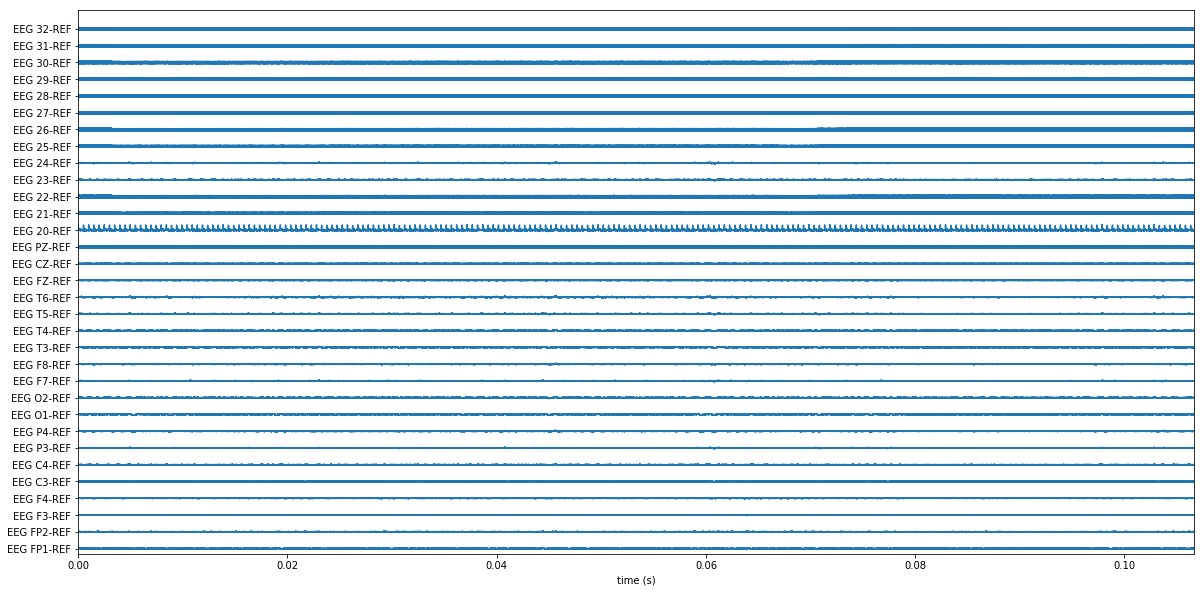

In [48]:
stacklineplot.stackplot(signals ,seconds=signals.shape[0]/300, ylabels=labels, yscale=.3)